In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

In [2]:
# 1. Load and Preprocess the Breast Cancer Dataset
print("Loading Breast Cancer dataset...")
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print("Dataset loaded.")

Loading Breast Cancer dataset...
Dataset loaded.


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


Training set size: 455 samples
Test set size: 114 samples


In [5]:
# 2. Define Multiple Base Estimators
base_estimators = {
    "Decision Tree (Depth 1)": DecisionTreeClassifier(max_depth=1, random_state=42),
    "Decision Tree (Depth 3)": DecisionTreeClassifier(max_depth=3, random_state=42),
    # Note: For SVC as a base estimator in AdaBoost, you often need probability=True
    # if using the default 'SAMME.R' algorithm, as it relies on class probabilities.
    # This can make training slower.
    "Linear SVC (C=0.1)": SVC(kernel='linear', C=0.1, probability=True, random_state=42),
    # "RBF SVC (C=0.1)": SVC(kernel='rbf', C=0.1, probability=True, random_state=42) # More complex SVC
}

In [6]:
results = {}
confusion_matrices = {} # To store confusion matrices for plotting

In [8]:
# 3. Loop through Base Estimators, Train AdaBoost, and Evaluate
print("\n--- Training AdaBoost with Different Base Estimators ---")

for name, base_est in base_estimators.items():
    print(f"\nTraining AdaBoost with {name} as base estimator...")

    adaboost_classifier = AdaBoostClassifier(
        estimator=base_est,
        n_estimators=100,
        learning_rate=0.1,
        algorithm='SAMME',
        random_state=42
    )

    adaboost_classifier.fit(X_train, y_train)
    y_pred = adaboost_classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report_str = classification_report(y_test, y_pred, target_names=cancer.target_names, output_dict=True)

    results[name] = {
        'Accuracy': accuracy,
        'Precision (Malignant)': class_report_str['malignant']['precision'],
        'Recall (Malignant)': class_report_str['malignant']['recall'],
        'F1-Score (Malignant)': class_report_str['malignant']['f1-score'],
        'Precision (Benign)': class_report_str['benign']['precision'],
        'Recall (Benign)': class_report_str['benign']['recall'],
        'F1-Score (Benign)': class_report_str['benign']['f1-score']
    }
    confusion_matrices[name] = conf_matrix

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Classification Report:\n{classification_report(y_test, y_pred, target_names=cancer.target_names)}")


--- Training AdaBoost with Different Base Estimators ---

Training AdaBoost with Decision Tree (Depth 1) as base estimator...


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


  Accuracy: 0.9561
  Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Training AdaBoost with Decision Tree (Depth 3) as base estimator...


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


  Accuracy: 0.9649
  Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.90      0.95        42
      benign       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114


Training AdaBoost with Linear SVC (C=0.1) as base estimator...


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


  Accuracy: 0.9386
  Classification Report:
              precision    recall  f1-score   support

   malignant       0.93      0.90      0.92        42
      benign       0.95      0.96      0.95        72

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



In [9]:
# 4. Display Comparative Results
results_df = pd.DataFrame.from_dict(results, orient='index')
print("\n--- Comparative Performance of AdaBoost with Different Base Estimators ---")
print(results_df)


--- Comparative Performance of AdaBoost with Different Base Estimators ---
                         Accuracy  Precision (Malignant)  Recall (Malignant)  \
Decision Tree (Depth 1)  0.956140               0.974359            0.904762   
Decision Tree (Depth 3)  0.964912               1.000000            0.904762   
Linear SVC (C=0.1)       0.938596               0.926829            0.904762   

                         F1-Score (Malignant)  Precision (Benign)  \
Decision Tree (Depth 1)              0.938272            0.946667   
Decision Tree (Depth 3)              0.950000            0.947368   
Linear SVC (C=0.1)                   0.915663            0.945205   

                         Recall (Benign)  F1-Score (Benign)  
Decision Tree (Depth 1)         0.986111           0.965986  
Decision Tree (Depth 3)         1.000000           0.972973  
Linear SVC (C=0.1)              0.958333           0.951724  


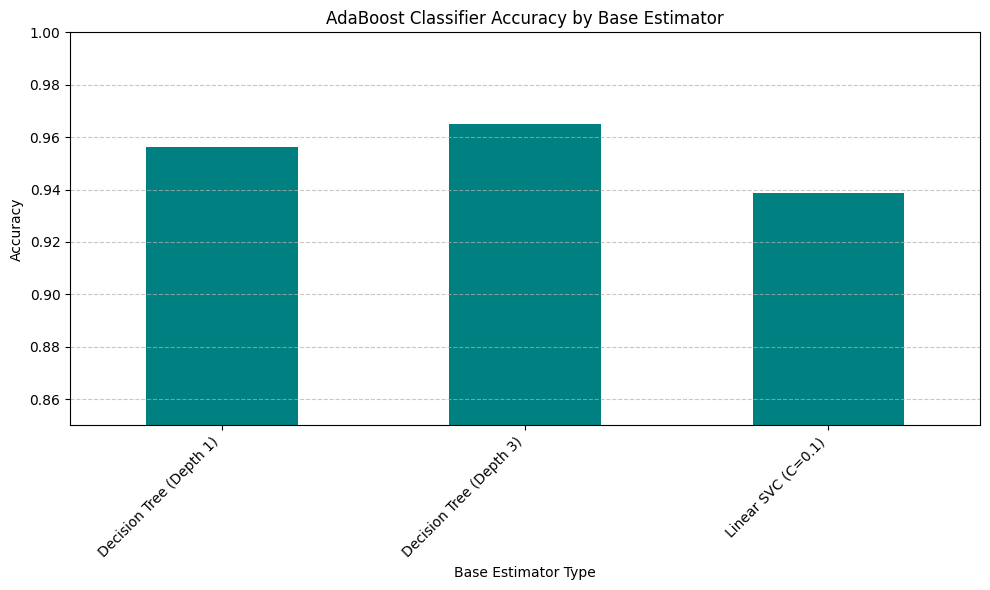

In [10]:
# 5. Visualize Comparative Performance (Accuracy)
plt.figure(figsize=(10, 6))
results_df['Accuracy'].plot(kind='bar', color='teal')
plt.title('AdaBoost Classifier Accuracy by Base Estimator')
plt.xlabel('Base Estimator Type')
plt.ylabel('Accuracy')
plt.ylim(0.85, 1.0) # Set y-axis limits to better show differences
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

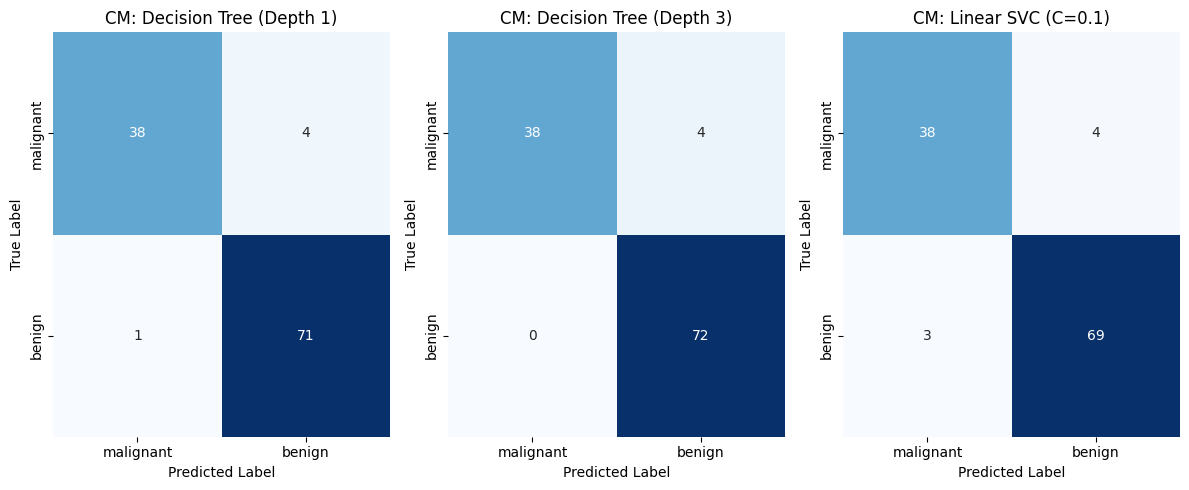

In [11]:
# 6. Visualize Confusion Matrices for each Base Estimator
fig, axes = plt.subplots(1, len(base_estimators), figsize=(4 * len(base_estimators), 5))
if len(base_estimators) == 1: # Handle case of single plot
    axes = [axes]

for i, (name, conf_matrix) in enumerate(confusion_matrices.items()):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=cancer.target_names, yticklabels=cancer.target_names, ax=axes[i])
    axes[i].set_title(f'CM: {name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()

In [12]:
print("\n--- Key Observation ---")
print("This demonstration shows how AdaBoost's performance can vary depending on the type and complexity of the 'weak learner' (base estimator) it uses.")
print("Decision stumps (Decision Tree Depth 1) are very common and often highly effective due to their simplicity, making them less prone to overfitting within the boosting process.")
print("More complex base estimators (like deeper trees or complex SVCs) can sometimes lead to overfitting if not carefully tuned, or might not improve the ensemble significantly for AdaBoost.")


--- Key Observation ---
This demonstration shows how AdaBoost's performance can vary depending on the type and complexity of the 'weak learner' (base estimator) it uses.
Decision stumps (Decision Tree Depth 1) are very common and often highly effective due to their simplicity, making them less prone to overfitting within the boosting process.
More complex base estimators (like deeper trees or complex SVCs) can sometimes lead to overfitting if not carefully tuned, or might not improve the ensemble significantly for AdaBoost.


In [13]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
X_train_sc, X_test_sc, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
results_sc = {}
confusion_matrices_sc = {} # To store confusion matrices for plotting

In [17]:
# 3. Loop through Base Estimators, Train AdaBoost, and Evaluate
print("\n--- Training AdaBoost with Different Base Estimators ---")

for name, base_est in base_estimators.items():
    print(f"\nTraining AdaBoost with {name} as base estimator...")

    adaboost_classifier = AdaBoostClassifier(
        estimator=base_est,
        n_estimators=100,
        learning_rate=0.1,
        algorithm='SAMME',
        random_state=42
    )

    adaboost_classifier.fit(X_train_sc, y_train)
    y_pred = adaboost_classifier.predict(X_test_sc)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report_str = classification_report(y_test, y_pred, target_names=cancer.target_names, output_dict=True)

    results_sc[name] = {
        'Accuracy': accuracy,
        'Precision (Malignant)': class_report_str['malignant']['precision'],
        'Recall (Malignant)': class_report_str['malignant']['recall'],
        'F1-Score (Malignant)': class_report_str['malignant']['f1-score'],
        'Precision (Benign)': class_report_str['benign']['precision'],
        'Recall (Benign)': class_report_str['benign']['recall'],
        'F1-Score (Benign)': class_report_str['benign']['f1-score']
    }
    confusion_matrices_sc[name] = conf_matrix

    print(f"  Accuracy: {accuracy:.4f}")
    print(f"  Classification Report:\n{classification_report(y_test, y_pred, target_names=cancer.target_names)}")


--- Training AdaBoost with Different Base Estimators ---

Training AdaBoost with Decision Tree (Depth 1) as base estimator...


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


  Accuracy: 0.9561
  Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Training AdaBoost with Decision Tree (Depth 3) as base estimator...


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


  Accuracy: 0.9649
  Classification Report:
              precision    recall  f1-score   support

   malignant       1.00      0.90      0.95        42
      benign       0.95      1.00      0.97        72

    accuracy                           0.96       114
   macro avg       0.97      0.95      0.96       114
weighted avg       0.97      0.96      0.96       114


Training AdaBoost with Linear SVC (C=0.1) as base estimator...


/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The parameter 'algorithm' is deprecated in 1.6 and has no effect. It will be removed in version 1.8.
  warnings.warn(


  Accuracy: 0.9386
  Classification Report:
              precision    recall  f1-score   support

   malignant       0.87      0.98      0.92        42
      benign       0.99      0.92      0.95        72

    accuracy                           0.94       114
   macro avg       0.93      0.95      0.94       114
weighted avg       0.94      0.94      0.94       114



In [18]:
# 4. Display Comparative Results
results_df1 = pd.DataFrame.from_dict(results_sc, orient='index')
print("\n--- Comparative Performance of AdaBoost with Different Base Estimators ---")
print(results_df1)


--- Comparative Performance of AdaBoost with Different Base Estimators ---
                         Accuracy  Precision (Malignant)  Recall (Malignant)  \
Decision Tree (Depth 1)  0.956140               0.974359            0.904762   
Decision Tree (Depth 3)  0.964912               1.000000            0.904762   
Linear SVC (C=0.1)       0.938596               0.872340            0.976190   

                         F1-Score (Malignant)  Precision (Benign)  \
Decision Tree (Depth 1)              0.938272            0.946667   
Decision Tree (Depth 3)              0.950000            0.947368   
Linear SVC (C=0.1)                   0.921348            0.985075   

                         Recall (Benign)  F1-Score (Benign)  
Decision Tree (Depth 1)         0.986111           0.965986  
Decision Tree (Depth 3)         1.000000           0.972973  
Linear SVC (C=0.1)              0.916667           0.949640  


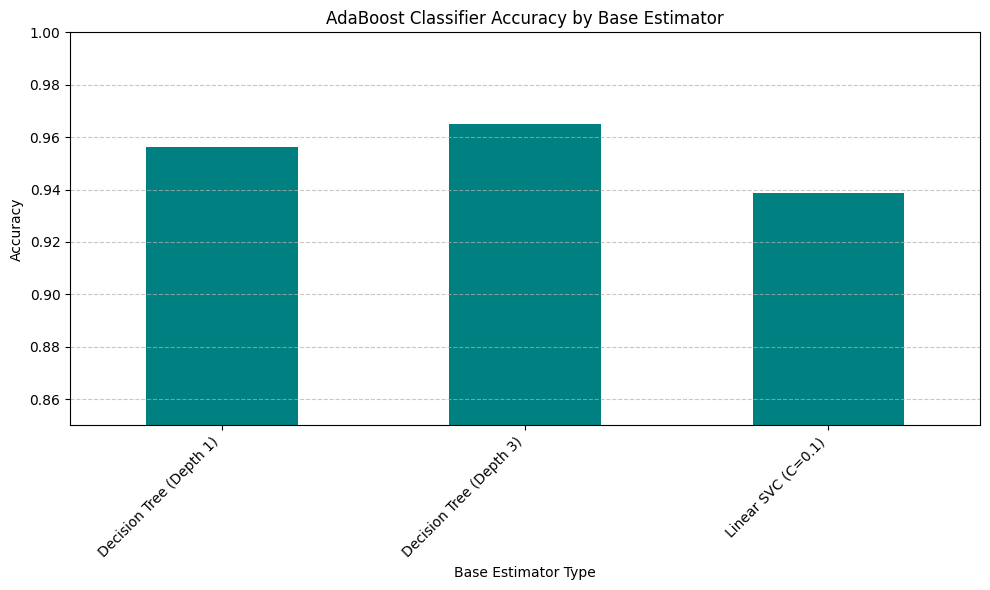

In [19]:
# 5. Visualize Comparative Performance (Accuracy)
plt.figure(figsize=(10, 6))
results_df1['Accuracy'].plot(kind='bar', color='teal')
plt.title('AdaBoost Classifier Accuracy by Base Estimator')
plt.xlabel('Base Estimator Type')
plt.ylabel('Accuracy')
plt.ylim(0.85, 1.0) # Set y-axis limits to better show differences
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

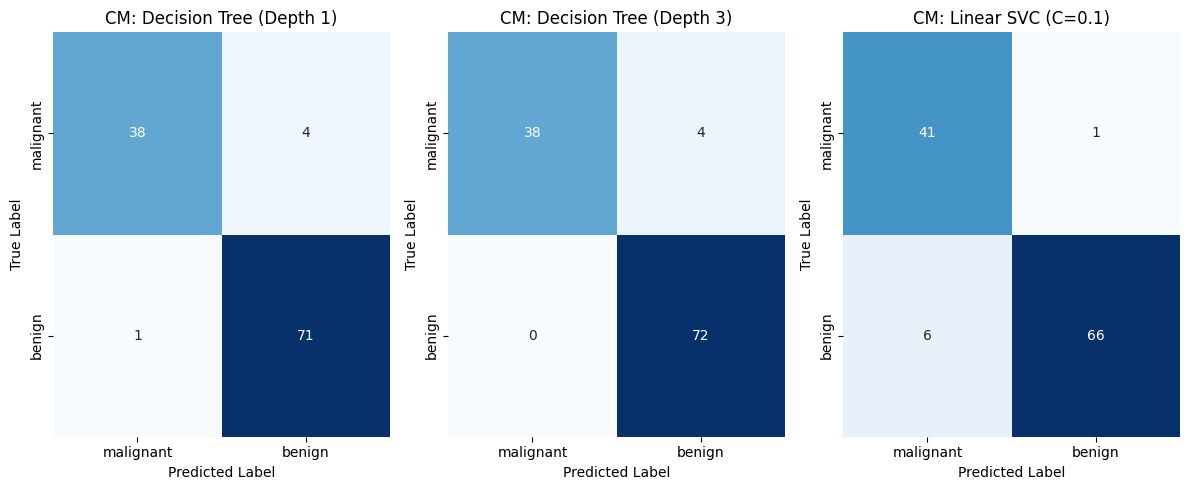

In [20]:
# 6. Visualize Confusion Matrices for each Base Estimator
fig, axes = plt.subplots(1, len(base_estimators), figsize=(4 * len(base_estimators), 5))
if len(base_estimators) == 1: # Handle case of single plot
    axes = [axes]

for i, (name, conf_matrix) in enumerate(confusion_matrices_sc.items()):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=cancer.target_names, yticklabels=cancer.target_names, ax=axes[i])
    axes[i].set_title(f'CM: {name}')
    axes[i].set_xlabel('Predicted Label')
    axes[i].set_ylabel('True Label')

plt.tight_layout()
plt.show()